## Final Project Submission

Please fill out:
* Student name: MARJORIE OPIYO
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:https://github.com/Opiyow/dsc-phase-2-project/blob/main/PHASE%202%20PROJECT.ipynb


## PROBLEM STATEMENT

The average sale price of a home in King County was $815K$  in August 2022, up 5.2% since last year. The average sale price per square foot in King County is $481K$, up 3.2% since last year.

In August 2022, King County home prices were up 5.0% compared to last year, selling for a median price of $815K. On average, homes in King County sell after 15 days on the market compared to 6 days last year. There were 2,744 homes sold in August this year, down from 3,877 last year (https://www.redfin.com/county/118/WA/King-County/housing-market). 

According to MaKe Realtors more houses are sitting on the market longer than previously observed, fewer people are buying homes and home prices in some areas are dropping. Clients are also backing out after viewing and inspecting units for sale. Could this be due to the condition of the units compared to the buying price quoted? 


It is taking MaKe Realtors slightly longer to sell through all the homes for sale at current demand than it would have the previous months,pointing to a less frenzied market.

Sellers who correctly price their homes in today’s market get top-of-market prices.  With this information MakE Realtors hope to optimize their pricing strategies based on the home features that potential home buyers deem crucial.

As the lead data scientist at MaKe, I have been tasked with creating an automated system to estimate the sale price of houses/homes, using information such as the house condition, square footage, number of bathrooms and bedrooms, waterfront and lot size. Estimates from the generated system will be used to predict the house sale prices by the real estate firm.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import folium
%matplotlib inline

## Loading Raw Data

In [2]:
file_path ='/Users/admin/Desktop/phase2_project/dsc-phase-2-project/data/kc_house_data.csv'
data =pd.read_csv(file_path, parse_dates =['date','yr_built','yr_renovated'])
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009-01-01,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014-01-01,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009-01-01,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004-01-01,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21597 rows and 21 columns. Each row of the dataset contains information about one house.

Our objective is to find a way to estimate the value in the "price" column using the values in the other columns. By achieving this using this set of data, then we should able to estimate prices of other houses too, simply by asking for information like bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement' etc

## Data Preprocessing

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  datetime64[ns]
 15  yr_renovated   1775

In [5]:
data.drop(['yr_renovated','yr_built', 'zipcode','view'], axis=1, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
lat,21597.0,4.756009e+01,1.385518e-01,4.715590e+01,4.747110e+01,4.757180e+01,4.767800e+01,4.777760e+01
long,21597.0,-1.222140e+02,1.407235e-01,-1.225190e+02,-1.223280e+02,-1.222310e+02,-1.221250e+02,-1.213150e+02


In [7]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
data.duplicated().sum()

0

## Data Cleaning

In [17]:
data['sqft_basement']= data['sqft_basement'].replace('?', '0.0' )

In [10]:
# data['sqft_basement']= data['sqft_basement'].astype('int64')

In [18]:
data['sqft_basement']= data['sqft_basement'].fillna(0)

In [19]:
pd.to_numeric(data['sqft_basement'])

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [14]:
data['bathrooms']= np.round(data['bathrooms'], decimals=0)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287


In [15]:
data[data['waterfront'].isna()]
data['waterfront'] = data['waterfront'].fillna(method ='bfill')

In [16]:
data['waterfront'].isna().sum()

0

In [17]:
data['waterfront'].value_counts()

NO     21427
YES      170
Name: waterfront, dtype: int64

In [18]:
data['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [19]:
data = data.drop(columns = ['id', 'date', 'grade'])

In [20]:
data[['price','condition']]


,price,condition
0,221900.0,Average
1,538000.0,Average
2,180000.0,Average
3,604000.0,Very Good
4,510000.0,Average
...,...,...
21592,360000.0,Average
21593,400000.0,Average
21594,402101.0,Average
21595,400000.0,Average


# Exploratory Data Analysis
we analyze the variables (with plots and descriptive statistics) and figure out the best predictors of our dependent variable. We'll use ordinary least squares (OLS),to assess our model and we therefore need ton test for the 'LINE' assumptions.


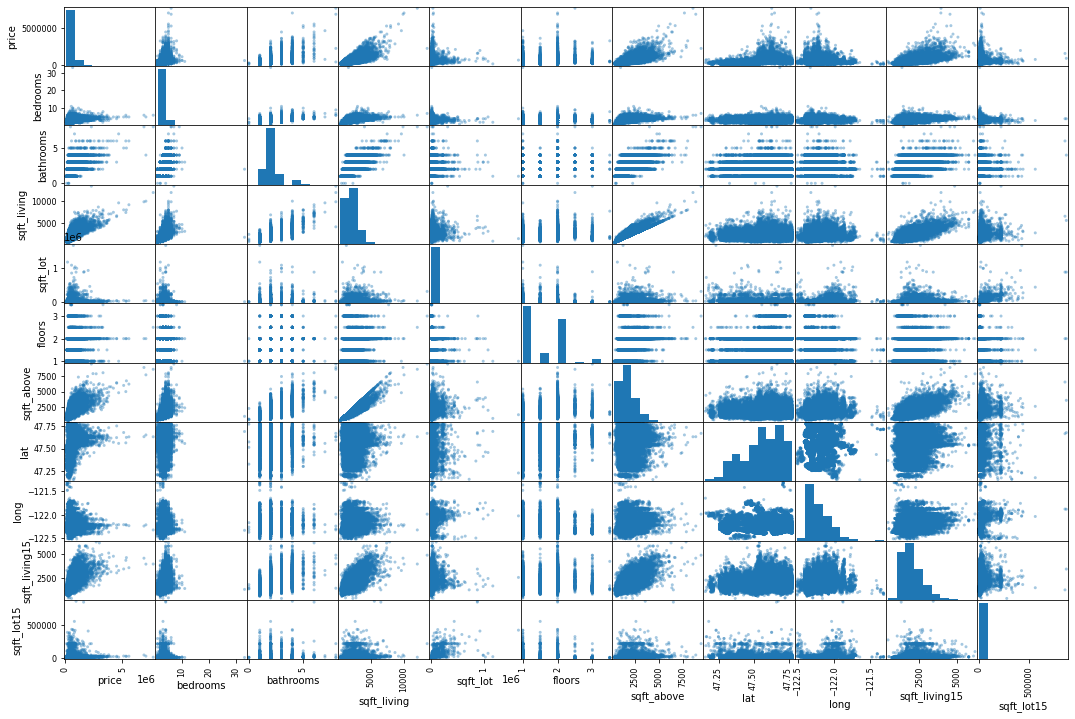

In [21]:
pd.plotting.scatter_matrix(data, figsize=(18,12), alpha=0.4);

In [22]:
# sns.pairplot(data);


## Test for normality

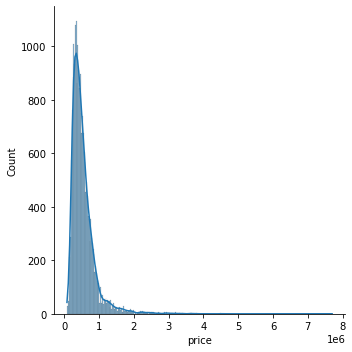

In [23]:
sns.displot(data['price'],kde=True);
#majority of the properties are valued below $1M then the price gets skewed to the right

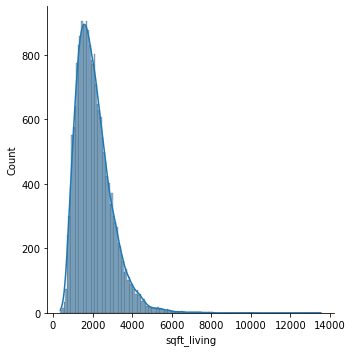

In [24]:
sns.displot(data['sqft_living'],kde=True);

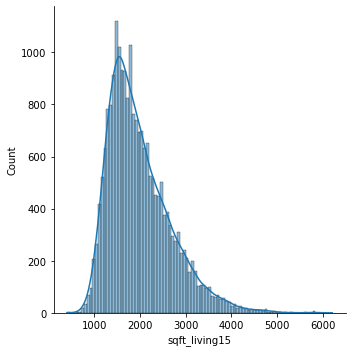

In [25]:
sns.displot(data['sqft_living15'],kde=True);

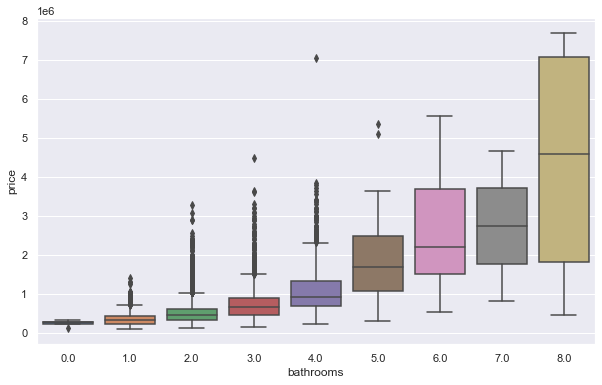

In [26]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=data, x='bathrooms', y='price');

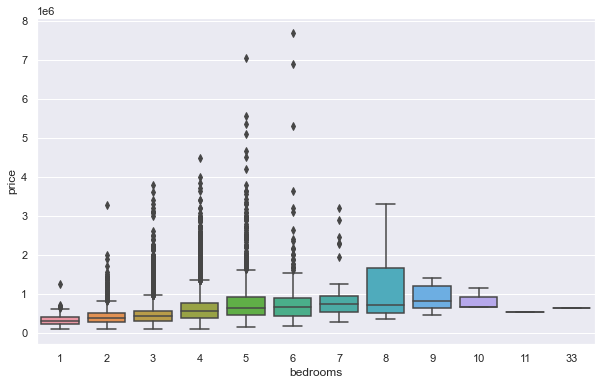

In [27]:
# from the boxplot, it appears that 11 and 33 are oultiers/misplaced values
# i opted to replace the  values by 1 and 3 respectively
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=data, x='bedrooms', y='price');
data['bedrooms']= data['bedrooms'].replace({11:1, 33:3})

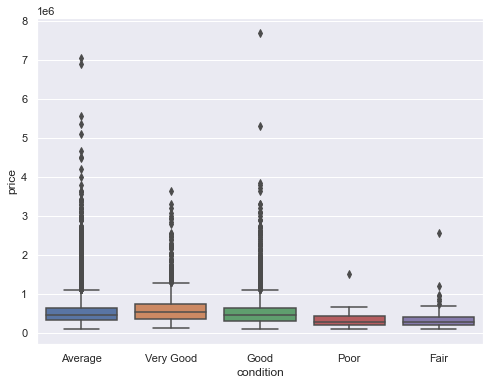

In [28]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=data, x='condition', y='price');

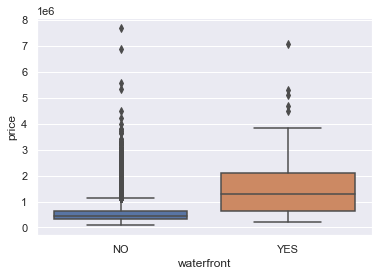

In [29]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(data=data, x='waterfront', y='price');

In [30]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [32]:
data['condition']

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

## Test for Linearity
sqft_living, sqft_above  and sqft_living15  show some degree of linearity with the price of homes but we can observe outliers where we observe low home prices for extreme values of these varibles. This could maybe be explained by these properties maybe being located in peri urban or rural areas thus not fetching high prices despite having large square feet.
We therefore cannot really drop these 'outlier' figure because essentially they define a feature of the dataset.


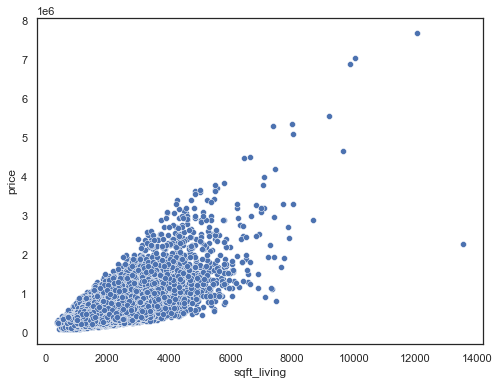

In [33]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('white')
sns.scatterplot(x='sqft_living', y='price',data=data);

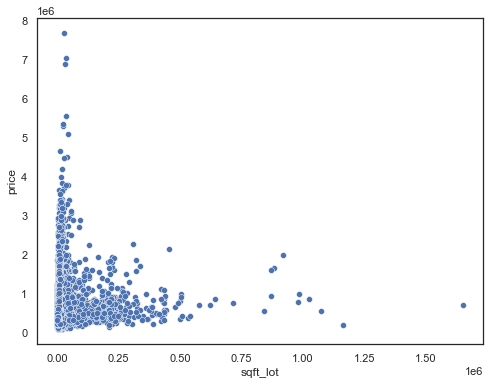

In [34]:
sns.set_style('white')
sns.scatterplot(x='sqft_lot', y='price',data=data);

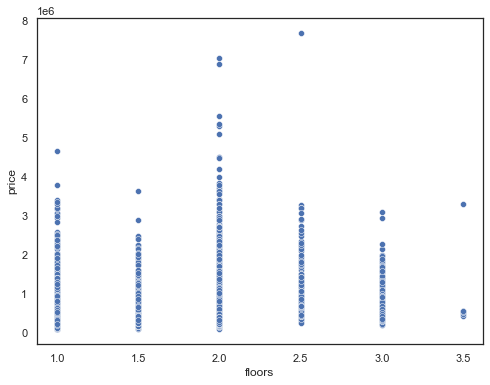

In [35]:
sns.set_style('white')
sns.scatterplot(x='floors', y='price',data=data);

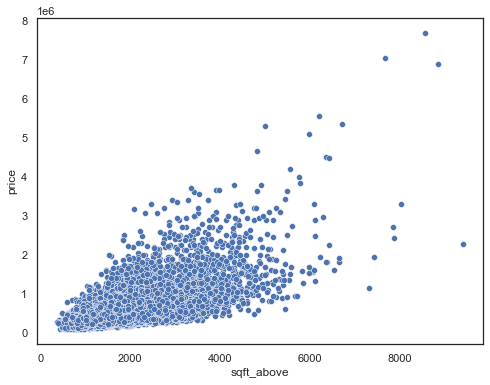

In [36]:
sns.set_style('white')
sns.scatterplot(x='sqft_above', y='price',data=data);

TypeError: 'value' must be an instance of str or bytes, not a float

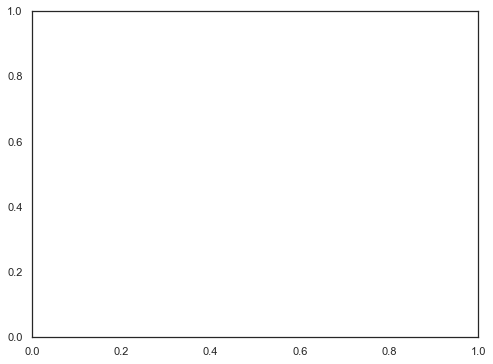

In [37]:
# sns.set_style('white')
# sns.scatterplot(x='sqft_basement', y='price',data=data);

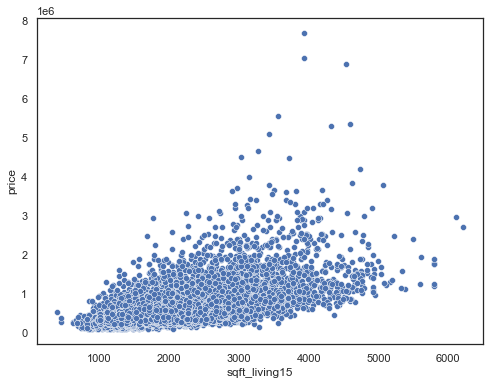

In [38]:
sns.set_style('white')
sns.scatterplot(x='sqft_living15', y='price',data=data);

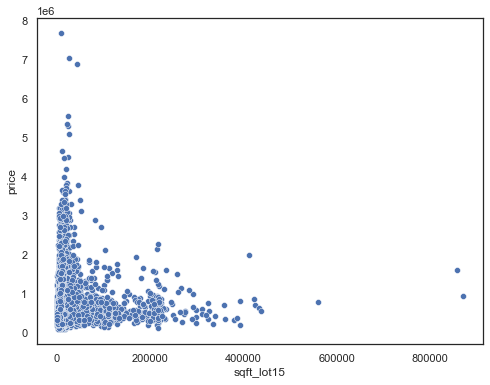

In [39]:
sns.set_style('white')
sns.scatterplot(x='sqft_lot15', y='price',data=data);

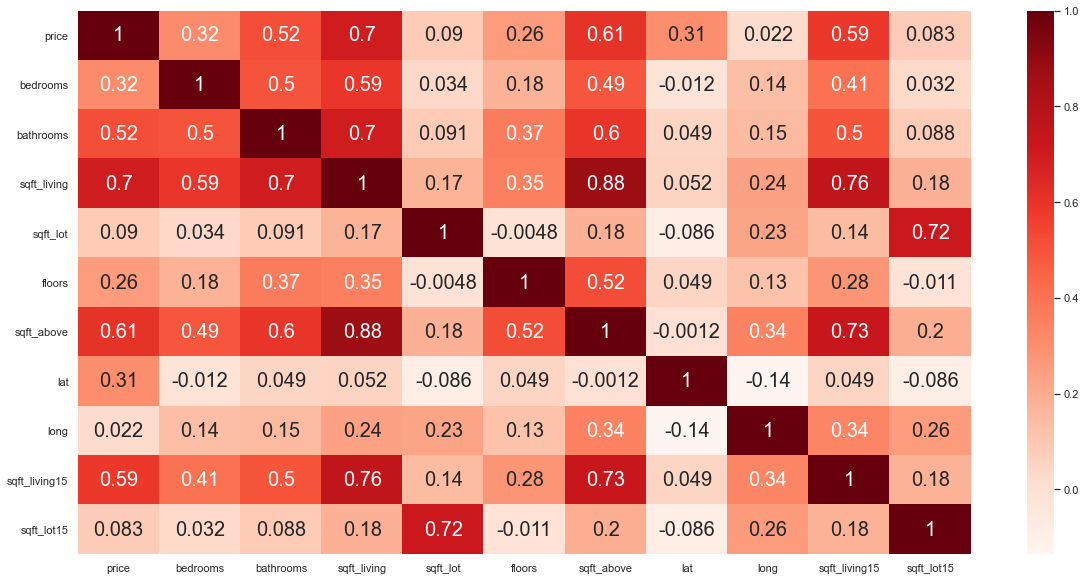

In [40]:
corr = data.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr, annot=True, cmap='Reds', annot_kws={'size':20});

In [41]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Feature Importance

In this section, we will split the data into x and y variables, run a tree-based estimator(decision tree and random forests) owing to the nature of data observed from the scatter plots. the data has outliers that we really cannot drop and therefore using OLS might lead to the line of best fit being affected by outliers.

In [42]:
X = data.drop(columns = ['price','condition','waterfront'])
y= data['price']

### Splitting Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

I have split the data into the training part and the testing part. Inside the train_test_split() method, I define the test_size to 0.3, that is, assigning 30% of the housing data set to the testing variables and 70% to the training variables.

The random_state means that the splitting of the data set into training and test part will be random and the same results will be reproducable

### Linear Regression

In [44]:
lm =LinearRegression()
lm.fit(X_train,y_train) #training the algorithm

LinearRegression()

In [45]:
y_pred =lm.predict(X_train)

## Performance evaluation

In [46]:
print(lm.intercept_)


print(lm.coef_)

-78948248.58163464
[-5.75711222e+04  4.30142578e+04  2.20146463e+02  2.06194391e-01
 -2.20450621e+04  4.25838343e+01  7.86648153e+00  6.48221172e+05
 -3.93492133e+05  8.71639973e+01 -4.09571586e-01]


In [47]:
print('R_squared:', metrics.r2_score(y_train,y_pred))
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_train,y_pred))*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_train,y_pred))
print('MSE:' , metrics.mean_squared_error(y_train,y_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R_squared: 0.6019412480227335
Adjusted_Rsquared: 0.6017383920453534
MAE: 147536.21943599466
MSE: 54564557349.30092
RMSE: 233590.57632811498


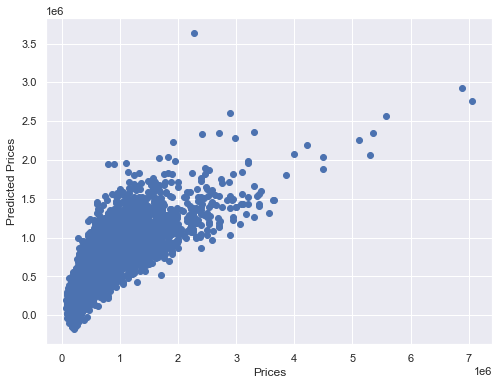

In [48]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices');


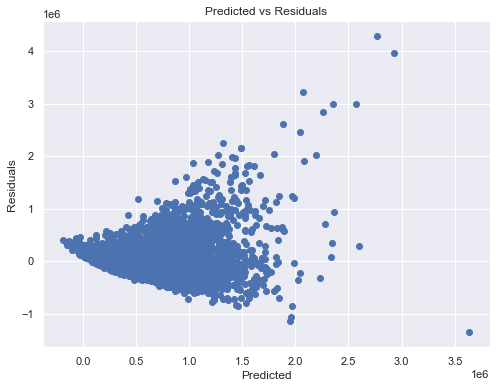

In [49]:
## Plotting Residual
r=y_train-y_pred
plt.scatter(y_pred,r)
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

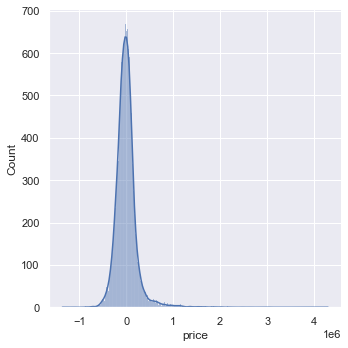

In [50]:
sns.displot(r, kde=True); 

In [51]:
y_test_pred =lm.predict(X_test)

In [52]:
r_squared = metrics.r2_score(y_test,y_test_pred)
print('R_squared:', r_squared)
print('Adjusted_Rsquared:', 1-(1-r_squared)*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:' , metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R_squared: 0.6120906858123034
Adjusted_Rsquared: 0.61189300212196
MAE: 145103.31348799725
MSE: 50427507135.78015
RMSE: 224560.69811028856


In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
19317,289000.0,2.449503e+05
13025,500000.0,7.288015e+05
9602,350000.0,4.618272e+05
9727,292000.0,3.983469e+05
1088,385000.0,3.774859e+05
...,...,...
18473,473000.0,4.851142e+05
20815,489950.0,4.341572e+05
12069,597000.0,7.423292e+05
8215,2190000.0,1.067185e+06


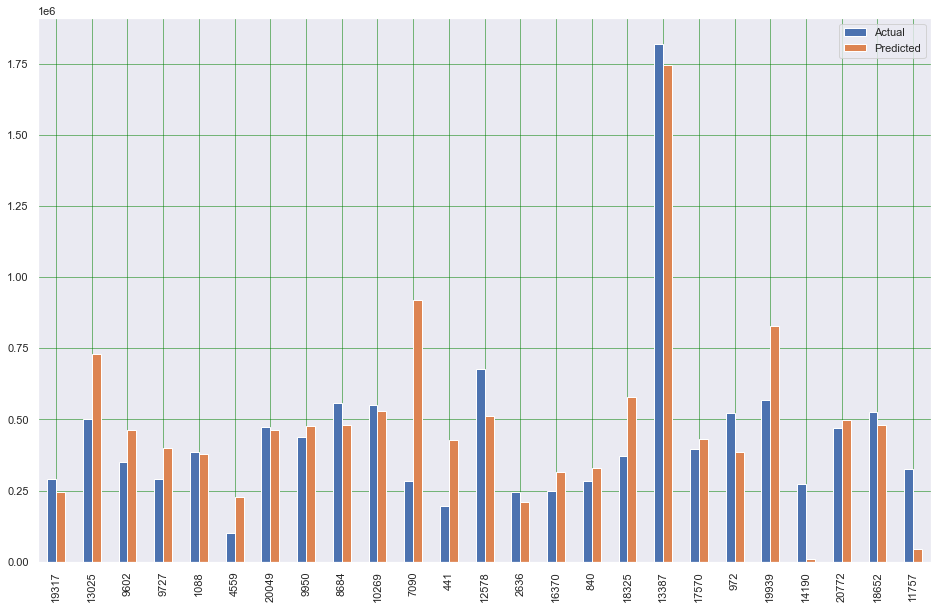

In [54]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:
#RandomForest

In [56]:
# class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', 
#                             max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                             max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#         oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [59]:
regr= RandomForestRegressor()

regr.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
y_pred2 = regr.predict(X_train)

print('R_squared:', metrics.r2_score(y_train,y_pred2))
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_train,y_pred2))*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_train,y_pred2))
print('MSE:' , metrics.mean_squared_error(y_train,y_pred2))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_train,y_pred2)))

R_squared: 0.9752581427425223
Adjusted_Rsquared: 0.9752455339665282
MAE: 29983.34953847608
MSE: 3391530728.9386244
RMSE: 58236.850266292946


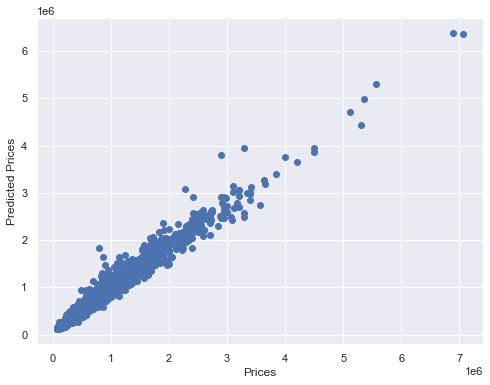

In [61]:
plt.scatter(y_train, y_pred2)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices');

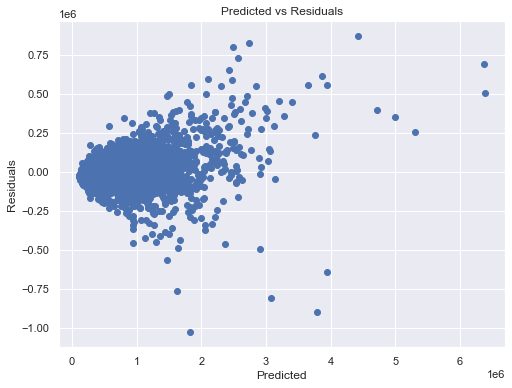

In [62]:
## Plotting Residual
r2=(y_train-y_pred2)
plt.scatter(y_pred2,r2)
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

In [63]:
y_test_predic = regr.predict(X_test)

In [64]:
act_linreg = metrics.r2_score(y_test, y_test_predic)
print('R_squared:', act_linreg)
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_test, y_test_predic))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_test, y_test_predic))
print('MSE:' , metrics.mean_squared_error(y_test, y_test_predic))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test, y_test_predic)))

R_squared: 0.8377524839325643
Adjusted_Rsquared: 0.8374765527827898
MAE: 79319.95794551367
MSE: 21091882754.571705
RMSE: 145230.44706455912


In [65]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predic})
df1

,Actual,Predicted
19317,289000.0,265103.50
13025,500000.0,519193.75
9602,350000.0,421002.34
9727,292000.0,341359.00
1088,385000.0,369058.50
...,...,...
18473,473000.0,513229.00
20815,489950.0,488927.10
12069,597000.0,548562.14
8215,2190000.0,1904550.00


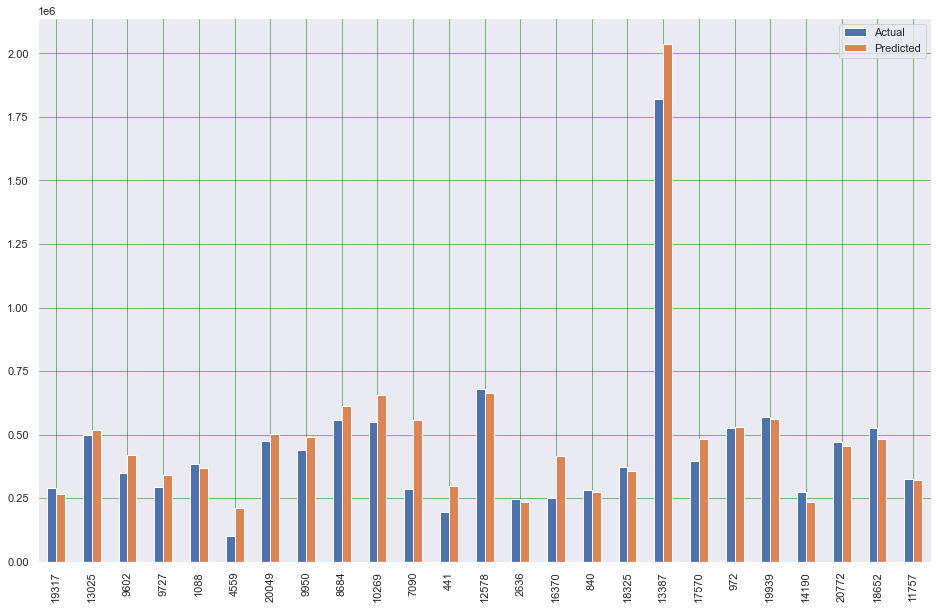

In [66]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [68]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

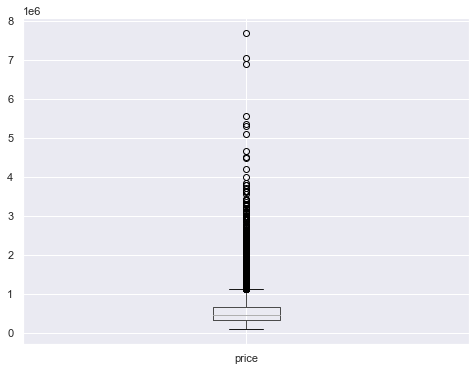

In [69]:
data.boxplot(column ='price');

In [21]:
df =data.copy()

In [22]:
df['logprice']=np.log(df['price'])
df = df.drop('price', axis=1)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,logprice
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650,12.309982
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639,13.195614
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062,12.100712
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000,13.311329
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509,12.793859
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200,12.899220
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007,12.904459
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287,12.899220


<AxesSubplot:>

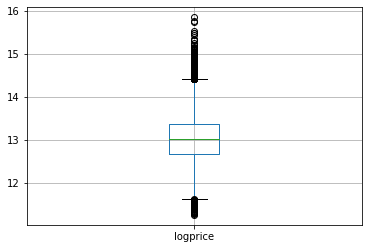

In [23]:
df.boxplot(column='logprice')

In [24]:
Q3 = np.quantile(df['logprice'],0.75)
Q1 = np.quantile(df['logprice'],0.25)
IQR =Q3-Q1
lower_range =Q1-1.5*IQR
upper_range =Q3+1.5*IQR
df =df[df['logprice']<upper_range]
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,logprice
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650,12.309982
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639,13.195614
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062,12.100712
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000,13.311329
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509,12.793859
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200,12.899220
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007,12.904459
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287,12.899220


In [25]:
df =df[df['logprice']>lower_range]
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,logprice
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650,12.309982
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639,13.195614
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062,12.100712
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000,13.311329
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509,12.793859
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200,12.899220
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007,12.904459
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287,12.899220


<AxesSubplot:>

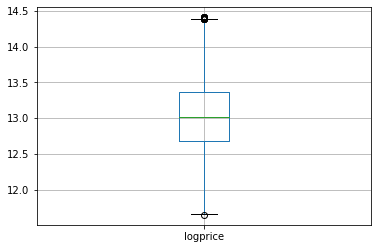

In [26]:
df.boxplot(column='logprice');

In [34]:
# df['sqft_basement']= df['sqft_basement'].fillna(0)

In [33]:
log_vars= ['logsqft_living', 'logsqft_lot','logsqft_above', 'logsqft_living15', 'logsqft_lot15']
df[log_vars] = np.log(df[['sqft_living', 'sqft_lot','sqft_above','sqft_living15', 'sqft_lot15']])
df[log_vars]

,logsqft_living,logsqft_lot,logsqft_above,logsqft_living15,logsqft_lot15
0,7.073270,8.639411,7.073270,7.200425,8.639411
1,7.851661,8.887653,7.682482,7.432484,8.941022
2,6.646391,9.210340,6.646391,7.908387,8.994917
3,7.580700,8.517193,6.956545,7.215240,8.517193
4,7.426549,8.997147,7.426549,7.495542,8.923058
...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,7.333023,7.319202
21593,7.745003,8.667852,7.745003,7.512071,8.881836
21594,6.927558,7.207860,6.927558,6.927558,7.604396
21595,7.377759,7.778211,7.377759,7.251345,7.160069


In [ ]:
df['logprice'].join

In [35]:
y= df['logprice']
X= df[log_vars].copy()
X

,logsqft_living,logsqft_lot,logsqft_above,logsqft_living15,logsqft_lot15
0,7.073270,8.639411,7.073270,7.200425,8.639411
1,7.851661,8.887653,7.682482,7.432484,8.941022
2,6.646391,9.210340,6.646391,7.908387,8.994917
3,7.580700,8.517193,6.956545,7.215240,8.517193
4,7.426549,8.997147,7.426549,7.495542,8.923058
...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,7.333023,7.319202
21593,7.745003,8.667852,7.745003,7.512071,8.881836
21594,6.927558,7.207860,6.927558,6.927558,7.604396
21595,7.377759,7.778211,7.377759,7.251345,7.160069
